# 1. Linear Regression


In [3]:


# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

<a id="section1"></a>
### 1.1 Simple python function using `numpy` 


In [4]:
def warm_up():
    """example function which prints idenity matrix"""
    A=np.eye(5)
    return A

warm_up()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 2. Linear regression with one variable
Now i will implement linear regression with one variable to predict profits for a food truck.

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 




In [6]:
#Loading data to data variable.
data=np.loadtxt(os.path.join('Data','ex1data1.txt'), delimiter=',')
X, y = data[:,0], data[:,1]
m=y.size

### 2.1 Plotting the Data

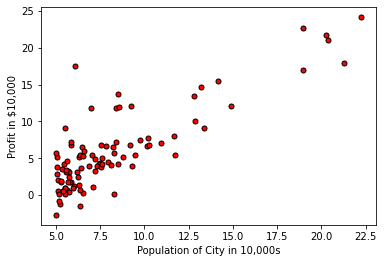

In [7]:
def plotData(x, y):
    """Plots the data points x and y into a figure with axex labels"""
    fig = pyplot.figure()  # open a new figure
    pyplot.plot(x, y, 'ro', ms=5, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
plotData(X,y)

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, I will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

#### 2.2.2 Implementation
In the following cell I add another dimension to our data to accomodate the $\theta_0$ intercept term.



In [8]:
X=np.stack([np.ones(m),X],axis=1) #don't execute more than once

#### 2.2.3 Computing the cost $J(\theta)$

When performing gradient descent to learn minimize the cost function $J(\theta)$, it is nessesary to monitor the convergence by computing the cost. In this section, I will implement a function to calculate $J(\theta)$ so I can see the convergence of your gradient descent implementation. 

In [10]:
def computeCost(X,y,theta):
    
    m=np.size(y)
    h = np.dot(X, theta)
    J=(1/(2*m)) * np.sum(np.square(np.dot(X,theta)-y))
    return J

In [14]:
print('Computing cost with theta= [0,0] (expected approx. 32) ')

computeCost(X,y,[0,0])


Computing cost with theta= [0,0] (expected approx. 32.07) 


32.072733877455676

In [15]:
print('Computing cost with theta= [-1,2] (expected approx. 54) ')
computeCost(X,y,[-1,2])

Computing cost with theta= [-1,2] (expected approx. 54) 


54.24245508201238

In [32]:
x=np.array([1,2,3])
np.dot(x,x)
y[:,None].shape

(97, 1)

<a id="section3"></a>
#### 2.2.4 Gradient descent
It is nessesary to understand what I am trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Best way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

In [16]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=y.shape[0]
    theta=theta.copy()
    J_history=[]
    for j in range(num_iters):
        theta=theta-alpha/m *(np.dot(X,theta)-y).dot(X)
        #print(np.dot(X,theta))
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [20]:
theta=np.zeros(2) #initializing theta = [0,0]
iterations=1500
alpha=0.01
theta , J_history= gradientDescent(X,y,theta,alpha,iterations)


print(f'Theta found: {theta}, expected=[-3.6   1.17]')


Theta found:[-3.63029144  1.16636235], expected=[-3.6   1.17]


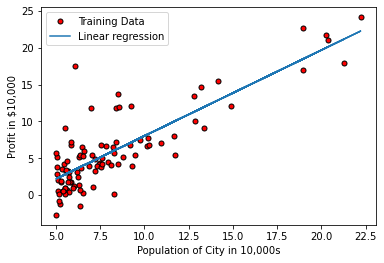

In [21]:
#plotting data with linear fit
plotData(X[:,1],y)
pyplot.plot(X[:,1],np.dot(X,theta),'-')
pyplot.legend(['Training Data','Linear regression'])

In [24]:
#Prediction for population size of 35000 and 70000

p1=np.dot([1,3.5],theta)
p2=np.dot([1,7],theta)

print(f'For 35000: {p1*10000:.2f}')
print(f'For 70000: {p2*10000:.2f}')

For 35000: 4519.77
For 70000: 45342.45


## 3 Linear regression with multiple variables

In this part, I will implement linear regression with multiple variables to predict the prices of houses.

Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

### 3.1 Feature Normalization

House sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [25]:
#loading new data
data=np.loadtxt(os.path.join("Data","ex1data2.txt"),delimiter=',')

In [29]:
X=data[:,:2]
y=data[:,2]
m=y.size
print('{:8.0f}'.format(X[1,0]))

    1600


In [30]:
#printing datapoints
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500



FeatureNormalize function:
- Subtracting the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”   

In [31]:
def featureNormalize(X):
    """
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    """
    X=X.copy()
    mu=np.zeros(X.shape[1])
    sigma=np.zeros(X.shape[1])
    mu=np.mean(X,axis=0)
    sigma=np.std(X,axis=0)
    X_norm=(X-mu)/sigma
    return X_norm, mu, sigma
    

In [35]:
#prining mean and std of X
print(f'Mean of X: {np.mean(X, axis=0)}')
print(f'Std of X: {np.std(X,axis=0)}')

Mean of X: [2000.68085106    3.17021277]
Std of X: [7.86202619e+02 7.52842809e-01]


In [36]:
#normalizing X
X_norm, mu, sigma= featureNormalize(X)
print(f'Computed mean: {mu}')
print(f'Computed standard deviation: {sigma}')

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [37]:
#adding intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


### 3.2 Compute Cost Multi

In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.

In [38]:
def computeCostMulti(X,y,theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    """
    m=y.shape[0]
    J=0
    J=1/(2*m)*np.sum(np.square(np.dot(X,theta)-y))
    return J

In [39]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
    """
    m = y.shape[0] # number of training examples
    theta = theta.copy()
    J_history = []
    
    for i in range(num_iters):
        
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history


After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.



theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]
Predicted price of a 1650 sq-ft, 3 br house $293081


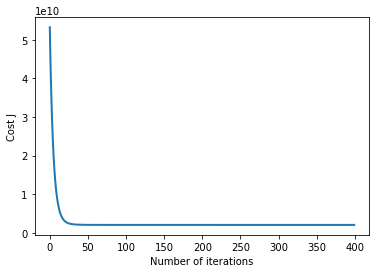

In [42]:

# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)  
print('Predicted price of a 1650 sq-ft, 3 br house ${:.0f}'.format(price))

### 3.3 Normal Equations
closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 


In [46]:
# Reloading data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [47]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    """
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [48]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)
print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $91511
